/Volumes/SSD_01/00_Python課程專用/PythonAI_Web_20231217/D91_書籍範例/02_Python:加密貨幣CTA量化交易111個實戰技巧/範例程式碼_20231218/historical_data.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old_ts = file_data.iloc[-1][0]
/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_45985/245455880.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data["position"] = self.data['signal'].fillna(method='ffill')
/Volumes/SSD_01/00_Python課程專用/PythonAI_Web_20231217/D91_書籍範例/02_Python:加密貨幣CTA量化交易111個實戰技巧/範例程式碼_20231218/backtest_class.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'buy_order' has dtype incompatible with float64, please explicitly cast to a 

總績效(來回成本0.001):0.3414
交易次數:774
平均績效(來回成本0.001):0.0004
勝率:0.6512
賺賠比:0.5556
賠率:1.0371
期望值:0.0129
獲勝持有時間:0 days 22:12:08.571428571
虧損持有時間:2 days 04:48:00
MDD:1.0361


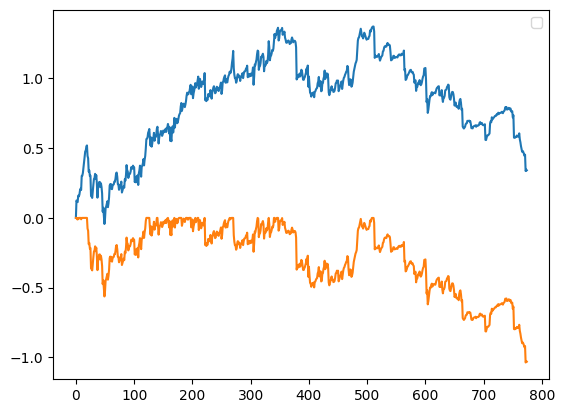

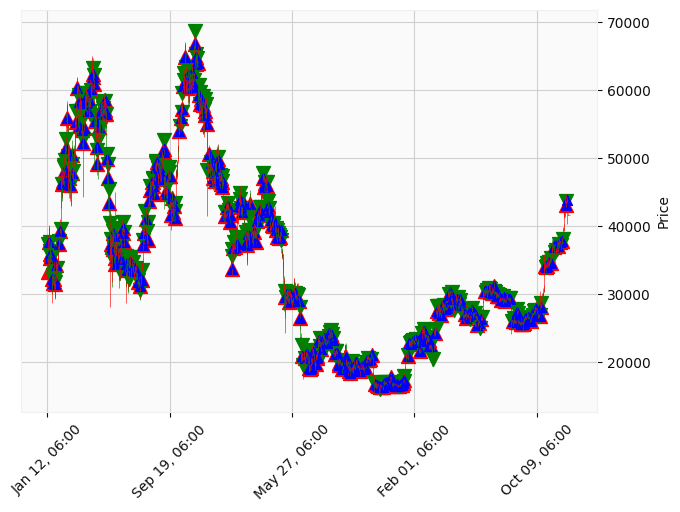

In [1]:
from backtest_class import Backtest


def run_strategy(self,):    # 定義回測函數
    self.data['position'] = None
    self.data.loc[self.data["close"] >
                  self.data['high'].shift(), 'signal'] = -1
    self.data.loc[self.data["close"] <
                  self.data['low'].shift(), 'signal'] = 1
    # 最重要的是 position陣列 後續的函數會抓取該陣列去進行交易明細的取得
    self.data["position"] = self.data['signal'].fillna(method='ffill')


symbol = "BTCBUSD"
interval = "6h"
Backtest.run_strategy = run_strategy  # 將回測函數定義為class函數
backtest = Backtest(symbol, interval)  # 實例化並取得回測資料
backtest.run_strategy()  # 開始回測
backtest.performance()  # 績效指標運算
backtest.equity_curve()  # 繪製權益區線
backtest.plot_order()   # 繪製下單點位
